In [1]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
import matplotlib
import progressbar
%matplotlib inline

In [2]:
# Set number of frames and frames per second
Nfrm = 360
fps = 60

# Coordinates for wave sources
source1 = [-10, 10]
source2 = [10, 10]

In [3]:
def generate(X, Y, phi):
    # Generates Z data for the points in the X, Y meshgrid and parameter phi.
    R1 = np.sin(np.sqrt((X + source1[0])**2 + (Y + source1[1])**2) + phi)
    R2 = np.sin(np.sqrt((X + source2[0])**2 + (Y + source2[1])**2) + phi)
    R = R2 + R1
    return R / 4

N/A% (0 of 360) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--

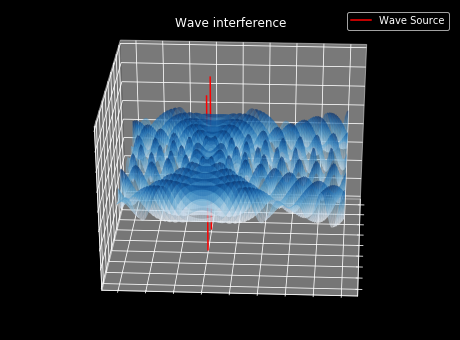

In [8]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

# Plot styling
plt.title("Wave interference")
plt.style.use('dark_background')


# Make the X, Y meshgrid.
xs = np.linspace(-40, 40, 125)
ys = np.linspace(-40, 40, 125)
X, Y = np.meshgrid(xs, ys)

# Set the z axis limits so they aren't recalculated each frame.
ax.set_zlim(-2, 2)

# Draw wave sources as vertical line segments
source1z = np.array([-2, 2])
source1x = np.array([-source1[0], -source1[0]])
source1y = np.array([-source1[1], -source1[1]])
ax.plot3D(source1x, source1y, source1z, 'red')

source2z = np.array([-2, 2])
source2x = np.array([-source2[0], -source2[0]])
source2y = np.array([-source2[1], -source2[1]])
ax.plot3D(source2x, source2y, source2z, 'red', label="Wave Source")
ax.legend()

# Remove ticklabels
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_zticklabels([])


# Progressbar for video generation
bar = progressbar.ProgressBar(max_value=Nfrm)

# Begin plotting.
surface = None
Z = generate(X, Y, 0)
def update(idx):
    phi=phis[idx]
    
    global surface
    # If a line collection is already remove it before drawing.
    if surface:
        # ax.collections.remove(wframe)
        ax.collections.remove(surface)

    # Plot the new surface and pause briefly before continuing.
    Z = generate(X, Y, phi * .1)
    surface = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='Blues', alpha=.5, edgecolor='none')
    
    # Rotate graph one unit
    ax.view_init(azim=idx * .75 + np.pi)
    
    # Update progressbar
    bar.update(idx)
    
phis = np.linspace(0, 180. / np.pi, Nfrm)
ani = animation.FuncAnimation(fig, update, Nfrm, interval=2000/fps)

In [7]:
# Generate html5 animation video
plt.rcParams['animation.html'] = 'html5'
ani

 99% (359 of 360) |##################### | Elapsed Time: 0:05:40 ETA:   0:00:00